In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

### Cleaning and EDA

In [2]:
#reading .csv file
table = pd.read_csv("C:/Users/ander/LightHouseNotes/final-project-tableau/Data/Old data/consumer_index.csv")
table


,date,region,measures,unit,index_value
0,Nov-79,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.3
1,Dec-79,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.4
2,Jan-80,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.3
3,Feb-80,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.4
4,Mar-80,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.3
...,...,...,...,...,...
5068,Aug-20,Canada,"Consumer Price Index (CPI) excluding food, ene...","Index, 2002=100",131.7
5069,Aug-20,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,1.1
5070,Sep-20,Canada,"Consumer Price Index (CPI) excluding food, ene...","Index, 2002=100",131.8
5071,Sep-20,Canada,"Consumer Price Index (CPI) excluding food, ene...","Index, 2002=100",132.0


In [3]:
#checking for Null values and columns type
table.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5073 entries, 0 to 5072
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         5073 non-null   object 
 1   region       5073 non-null   object 
 2   measures     5073 non-null   object 
 3   unit         5073 non-null   object 
 4   index_value  5003 non-null   float64
dtypes: float64(1), object(4)
memory usage: 198.3+ KB


In [4]:
#removing the lines where index_value null
table = table.dropna()
table = table.reset_index(drop=True)
table

,date,region,measures,unit,index_value
0,Nov-79,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.3
1,Dec-79,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.4
2,Jan-80,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.3
3,Feb-80,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.4
4,Mar-80,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.3
...,...,...,...,...,...
4998,Aug-20,Canada,"Consumer Price Index (CPI) excluding food, ene...","Index, 2002=100",131.7
4999,Aug-20,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,1.1
5000,Sep-20,Canada,"Consumer Price Index (CPI) excluding food, ene...","Index, 2002=100",131.8
5001,Sep-20,Canada,"Consumer Price Index (CPI) excluding food, ene...","Index, 2002=100",132.0


In [5]:
#checking for duplicate
len(table.drop_duplicates()) == len(table)

True

In [6]:
table.describe()

,index_value
count,5003.000000
mean,73.388307
std,50.619677
min,-1.900000
25%,1.800000
50%,94.900000
75%,114.350000
max,136.300000


In [7]:
#checking for incorect entries
for i in table.columns:
    print('{}:{}'.format(i,table[i].unique()))

date:['Nov-79' 'Dec-79' 'Jan-80' 'Feb-80' 'Mar-80' 'Apr-80' 'May-80' 'Jun-80'
 'Jul-80' 'Aug-80' 'Sep-80' 'Oct-80' 'Nov-80' 'Dec-80' 'Jan-81' 'Feb-81'
 'Mar-81' 'Apr-81' 'May-81' 'Jun-81' 'Jul-81' 'Aug-81' 'Sep-81' 'Oct-81'
 'Nov-81' 'Dec-81' 'Jan-82' 'Feb-82' 'Mar-82' 'Apr-82' 'May-82' 'Jun-82'
 'Jul-82' 'Aug-82' 'Sep-82' 'Oct-82' 'Nov-82' 'Dec-82' 'Jan-83' 'Feb-83'
 'Mar-83' 'Apr-83' 'May-83' 'Jun-83' 'Jul-83' 'Aug-83' 'Sep-83' 'Oct-83'
 'Nov-83' 'Dec-83' 'Jan-84' 'Feb-84' 'Mar-84' 'Apr-84' 'May-84' 'Jun-84'
 'Jul-84' 'Aug-84' 'Sep-84' 'Oct-84' 'Nov-84' 'Dec-84' 'Jan-85' 'Feb-85'
 'Mar-85' 'Apr-85' 'May-85' 'Jun-85' 'Jul-85' 'Aug-85' 'Sep-85' 'Oct-85'
 'Nov-85' 'Dec-85' 'Jan-86' 'Feb-86' 'Mar-86' 'Apr-86' 'May-86' 'Jun-86'
 'Jul-86' 'Aug-86' 'Sep-86' 'Oct-86' 'Nov-86' 'Dec-86' 'Jan-87' 'Feb-87'
 'Mar-87' 'Apr-87' 'May-87' 'Jun-87' 'Jul-87' 'Aug-87' 'Sep-87' 'Oct-87'
 'Nov-87' 'Dec-87' 'Jan-88' 'Feb-88' 'Mar-88' 'Apr-88' 'May-88' 'Jun-88'
 'Jul-88' 'Aug-88' 'Sep-88' 'Oct-88' 'Nov-88' 

In [8]:
#Changing date to datetime format
date = []
for i in table['date']:
    date.insert(len(date), datetime.strptime(i, '%b-%y'))

table['date'] = date
table


,date,region,measures,unit,index_value
0,1979-11-01,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.3
1,1979-12-01,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.4
2,1980-01-01,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.3
3,1980-02-01,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.4
4,1980-03-01,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.3
...,...,...,...,...,...
4998,2020-08-01,Canada,"Consumer Price Index (CPI) excluding food, ene...","Index, 2002=100",131.7
4999,2020-08-01,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,1.1
5000,2020-09-01,Canada,"Consumer Price Index (CPI) excluding food, ene...","Index, 2002=100",131.8
5001,2020-09-01,Canada,"Consumer Price Index (CPI) excluding food, ene...","Index, 2002=100",132.0


In [9]:
table.describe()

,index_value
count,5003.000000
mean,73.388307
std,50.619677
min,-1.900000
25%,1.800000
50%,94.900000
75%,114.350000
max,136.300000


In [10]:
#checking for incorect entries
for i in table.columns:
    print('{}:{}'.format(i,table[i].unique()))

date:['1979-11-01T00:00:00.000000000' '1979-12-01T00:00:00.000000000'
 '1980-01-01T00:00:00.000000000' '1980-02-01T00:00:00.000000000'
 '1980-03-01T00:00:00.000000000' '1980-04-01T00:00:00.000000000'
 '1980-05-01T00:00:00.000000000' '1980-06-01T00:00:00.000000000'
 '1980-07-01T00:00:00.000000000' '1980-08-01T00:00:00.000000000'
 '1980-09-01T00:00:00.000000000' '1980-10-01T00:00:00.000000000'
 '1980-11-01T00:00:00.000000000' '1980-12-01T00:00:00.000000000'
 '1981-01-01T00:00:00.000000000' '1981-02-01T00:00:00.000000000'
 '1981-03-01T00:00:00.000000000' '1981-04-01T00:00:00.000000000'
 '1981-05-01T00:00:00.000000000' '1981-06-01T00:00:00.000000000'
 '1981-07-01T00:00:00.000000000' '1981-08-01T00:00:00.000000000'
 '1981-09-01T00:00:00.000000000' '1981-10-01T00:00:00.000000000'
 '1981-11-01T00:00:00.000000000' '1981-12-01T00:00:00.000000000'
 '1982-01-01T00:00:00.000000000' '1982-02-01T00:00:00.000000000'
 '1982-03-01T00:00:00.000000000' '1982-04-01T00:00:00.000000000'
 '1982-05-01T00:00:0

<Axes: >

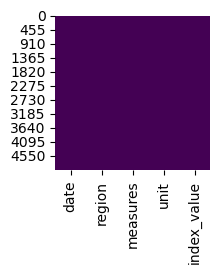

In [11]:
#Visualizing missing value
plt.figure(figsize=(2,2))
sns.heatmap(table.isnull(), cbar=False,cmap='viridis')

In [97]:
#saving cleaned file
table.to_csv('C:/Users/ander/LightHouseNotes/final-project-tableau/Data/Cleaned data/consumer_index.csv', index=False)
table


,date,region,measures,unit,index_value
0,1979-11-01,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.3
1,1979-12-01,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.4
2,1980-01-01,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.3
3,1980-02-01,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.4
4,1980-03-01,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.3
...,...,...,...,...,...
4998,2020-08-01,Canada,"Consumer Price Index (CPI) excluding food, ene...","Index, 2002=100",131.7
4999,2020-08-01,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,1.1
5000,2020-09-01,Canada,"Consumer Price Index (CPI) excluding food, ene...","Index, 2002=100",131.8
5001,2020-09-01,Canada,"Consumer Price Index (CPI) excluding food, ene...","Index, 2002=100",132.0
